# COGS 108 - Final Project

# Overview
In this project, I intended to identify the revenues and expenses of four different fundings types for San Diego Parks & Recreation budget. These four types are "General Fund", "Enterprise Funds", "Capital Project Fund" and "Special Revenue Fund". I looked at a dataset of San Diego operating budget with the amount of revenue and expenses for Parks & Recreation funds. From this analysis, I found that General Fund for San Diego Parks & Recreation use had the highest revenues and expenses while Capital Project Funds had the lowest revenues and expenses. 

# Name & GitHub
- Name: Allison Gao
- GitHub Username: AllisonGao

# Research Question
What is the relationship and distribution of revenue and expenses for four categories of funds for Parks & Recreation: General fund; Special Revenue Fund; Enterprise Fund; Capital Project Fund? What can we learn and foresee from the distribution of money? For this data analysis, we will specifically looking at fundings in San Diego Parks & Recreation.

# Background and Prior Work
Funding and Budgeting are important measures for the government to carry out city operations and services. A fund is a separate fiscal and accounting entity with a self-balancing set of accounts recording cash and other financial resources, together with all related liabilities and residual equities or balances, or changes therein(1). 

In San Diego Parks & Recreation department, there are four major funding types: General Fund, Enterprise Funds, Capital Project Fund and Special Revenue Fund. Each accounts for different levels of reveneus and expenses. The General Fund is where the government accounts for everything not reported in another fund; Special revenue fund is for reporting specific revenue sources that are limited to being used for a particular purpose; Capital project fund tracks the accumulation and use of resources for constructing, acquiring, and rehabilitating capital assets, such as buildings and roads; Enterprise fund is a self-supporting government fund that sells goods and services to the public for a fee(3).

Why should we care about the distribution and trend of the avenues and expenses of funds? Recording and regularly reviewing the expenses gives us a good idea of the revenue earned against the money spent. It helps the administration pinpoint unnecessary expenditures and know when it’s time and how to cut costs to maintain profitability. Ultimately, this helps the government plan for the future of Parks & Recreation development and maintenance in San Diego County with more clarity and confidence(2).



### Refrences(include links):
- 1)https://nces.ed.gov/pubs2009/fin_acct/chapter6_1.asp
- 2)https://www.summitfr.com/examining-business-expenses-is-a-measure-of-success/
- 3)https://www.gasb.org/cs/ContentServer?cid=1176156737123&d=Touch&pagename=GASB%2FGASBContent_C%2FUsersArticlePage

# Hypothesis
I hypothesize that Capital Project Fund would have the lowest expense since the dataset was recored in recent years and few major new parks & recreation was built; Enterprise Funds would have the highest revenue since the fund was meant to sell service and self-support.

# Datasets
### Dataset 1:

- Dataset Name: actuals_operating_datasd
- Link to the dataset: no link, dataset was provided through Github
- Number of observations: 454891 observations

This dataset provides information on the amount of revenue and expenses go into Parks & Recreation in San Diego and specified the type of fundings. 

### Dataset 2:

- Dataset Name: operating_actuals_dictionary_datasd
- Link to the dataset: no link, dataset was provided through Github
- Number of observations: 7 observations

This dataset serves as the dictionary for dataset 1.

# Setup

In [1]:
#import libraries needed for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
#load the datasets used for analysis
df_budget = pd.read_csv('actuals_operating_datasd.csv')
df_budget_dictionary = pd.read_csv('operating_actuals_dictionary_datasd.csv')

First take a look at the dictionary for the main dataset we are going to use to get a better understanding of which data should be preserved and which should be dropped. We quickly noticed that explanation for "report_fy" in the df_budget was missing here. However, we can logically predict that "report_fy" stands for "the fiscal year in which the data were reported, which will not be particularly analyzed in the project.

In [3]:
#display dictionary
df_budget_dictionary

,field,description,possible_values
0,amount,Amount spent,NaN
1,fund_type,Groups funds by general purpose,NaN
2,fund_number,Uniquely identifies the fund. Capital funds ar...,NaN
3,dept_name,Department name,NaN
4,funds_center_number,Unique identifier for a funds center. A funds ...,NaN
5,account,Describes the smallest subset of an account gr...,NaN
6,account_number,Uniquely identifies an expense or revenue acco...,NaN


Since I will only be analyzing over revenues and expenses on "Parks & Recreation" in San Diego, I will start with slicing the data and save it in a new dataframe named df_park_budget.

In [4]:
#slice data 
df_park_budget = df_budget.loc[df_budget['dept_name'] == 'Parks & Recreation']

df_park_budget



,amount,report_fy,fund_type,fund_number,dept_name,funds_center_number,account,account_number
8111,75.52,17,General Fund,100000,Parks & Recreation,1714110001,Graffitti Control Restitution,417024
8112,156.84,17,General Fund,100000,Parks & Recreation,1714110001,Repair Damages Recovered,423106
8113,-6478.12,17,General Fund,100000,Parks & Recreation,1714110001,Salaried Wages,500011
8114,-188.86,17,General Fund,100000,Parks & Recreation,1714110001,Supp Pens Sav Plan Mandatory,502021
8115,-181.19,17,General Fund,100000,Parks & Recreation,1714110001,Supp Pens Sav Plan Voluntary,502022
...,...,...,...,...,...,...,...,...
450333,281118.00,19,Enterprise Funds,700043,Parks & Recreation,1714161317,Rent Expense (Non-Discretionary),512217
450334,7.52,19,Enterprise Funds,700043,Parks & Recreation,1714161317,Wireless Stipend,512245
450335,104533.52,19,Enterprise Funds,700043,Parks & Recreation,1714161317,Electric Services,514100
450336,557.23,19,Enterprise Funds,700043,Parks & Recreation,1714161317,Gas Services,514101


To make the dataset more manageable, I dropped the colums with information that I won't be using for this analysis(report_fy; fund_number ; funds_center_number; account). This could be one of the limitations of the analysis since these information could have potentially been applicable to this project.

I also reset the index for the dataset for clearer interpretation.

In [5]:
#reset index for dataset
df_park_budget = df_park_budget.reset_index()

#drop columns not needed for analysis
df_park_budget = df_park_budget.drop(['index', 'report_fy', 'fund_number', 'funds_center_number', 'account'], axis=1)

df_park_budget

,amount,fund_type,dept_name,account_number
0,75.52,General Fund,Parks & Recreation,417024
1,156.84,General Fund,Parks & Recreation,423106
2,-6478.12,General Fund,Parks & Recreation,500011
3,-188.86,General Fund,Parks & Recreation,502021
4,-181.19,General Fund,Parks & Recreation,502022
...,...,...,...,...
89850,281118.00,Enterprise Funds,Parks & Recreation,512217
89851,7.52,Enterprise Funds,Parks & Recreation,512245
89852,104533.52,Enterprise Funds,Parks & Recreation,514100
89853,557.23,Enterprise Funds,Parks & Recreation,514101


From dictionary we know that the first digit of "account_number" indicates different meanings. "4" stands for revenues while "5" stands for expenses. Thus, I create a function to specify this information and replace "account_number" column with a new column "account_type" which has possible values of "revenue" or "expense".

In [6]:
#function to convert account_number to account_type
def convert_label(num):
    num = str(num)[:1]
    if num == '4':
        return 'revenue'
    else:
        return 'expense'

#apply function to column 'account_number', add as new column 'account_type'
df_park_budget['account_type'] = df_park_budget['account_number'].apply(convert_label)

#drop column 'account_type'
df_park_budget = df_park_budget.drop(['account_number'], axis=1)

df_park_budget

,amount,fund_type,dept_name,account_type
0,75.52,General Fund,Parks & Recreation,revenue
1,156.84,General Fund,Parks & Recreation,revenue
2,-6478.12,General Fund,Parks & Recreation,expense
3,-188.86,General Fund,Parks & Recreation,expense
4,-181.19,General Fund,Parks & Recreation,expense
...,...,...,...,...
89850,281118.00,Enterprise Funds,Parks & Recreation,expense
89851,7.52,Enterprise Funds,Parks & Recreation,expense
89852,104533.52,Enterprise Funds,Parks & Recreation,expense
89853,557.23,Enterprise Funds,Parks & Recreation,expense


We then notice some of the number in "amount" is negative for expense and some of them are positive for expense. To remain consistent throughout the analysis, I create a function to make sure all values in "amount" column are positive.

In [7]:
#function to convert 'amount' to be consistenly positive
def convert_value(input):
    if input <= 0:
        input = -1 * input
        return input
    else:
        return input
    
#apply fuction to column 'amount'
df_park_budget['amount'] = df_park_budget['amount'].apply(convert_value)

df_park_budget

,amount,fund_type,dept_name,account_type
0,75.52,General Fund,Parks & Recreation,revenue
1,156.84,General Fund,Parks & Recreation,revenue
2,6478.12,General Fund,Parks & Recreation,expense
3,188.86,General Fund,Parks & Recreation,expense
4,181.19,General Fund,Parks & Recreation,expense
...,...,...,...,...
89850,281118.00,Enterprise Funds,Parks & Recreation,expense
89851,7.52,Enterprise Funds,Parks & Recreation,expense
89852,104533.52,Enterprise Funds,Parks & Recreation,expense
89853,557.23,Enterprise Funds,Parks & Recreation,expense


After the data cleaning process, we ended up with a dataframe that specifies the fund type with four possible values, account type with two possible values and amount of money per transaction.

# Data Analysis & Results

Since we are trying to study the trend of revenues and expenses among four different fund types, we groupby the "fund_type" to take a look at the statistics.

In [8]:
#group dateframe by fund_type
df_stats = df_park_budget.groupby(['fund_type'])

#describe the updated dataframe
df_stats.describe()

amount                                         \
                         count          mean            std       min   
fund_type                                                               
Capital Project Funds      6.0  62693.650000   15784.949468  42506.04   
Enterprise Funds        9266.0  34670.517512  305764.203997      0.01   
General Fund           72386.0  16601.039963  124646.054261      0.01   
Special Revenue Funds   8197.0  60943.925909  452643.128473      0.01   

                                                                       
                              25%        50%         75%          max  
fund_type                                                              
Capital Project Funds  49474.2575  70378.910  73991.7275     75196.00  
Enterprise Funds         318.2800   1526.905   6816.2400  11102062.38  
General Fund             175.9850    984.000   4930.0150  10191392.00  
Special Revenue Funds    342.2600   2635.000  16660.2900  11110140.52

In [9]:
#generate dataframe df_capital which has rows for revenues in Capital Project Funds
df_capital = df_park_budget.loc[(df_park_budget['fund_type'] == 'Capital Project Funds') & (df_park_budget['account_type'] == 'revenue')]
#sum up the revenue of Capital Project Funds 
capital_revenue = df_capital['amount'].sum()

#generate dataframe df_capital which has rows for expense in Capital Project Funds
df_capital = df_park_budget.loc[(df_park_budget['fund_type'] == 'Capital Project Funds') & (df_park_budget['account_type'] == 'expense')]
#sum up the expense of Capital Project Funds
capital_expense = df_capital['amount'].sum()

#generate dataframe df_capital which include total amount of revenue and expense for Capital Project Funds
data1 = [{'revenue': capital_revenue, 'expense':capital_expense}]
df_capital = pd.DataFrame(data1, index=['Capital Project Funds'], columns=['revenue', 'expense'])

df_capital

,revenue,expense
Capital Project Funds,0.0,376161.9


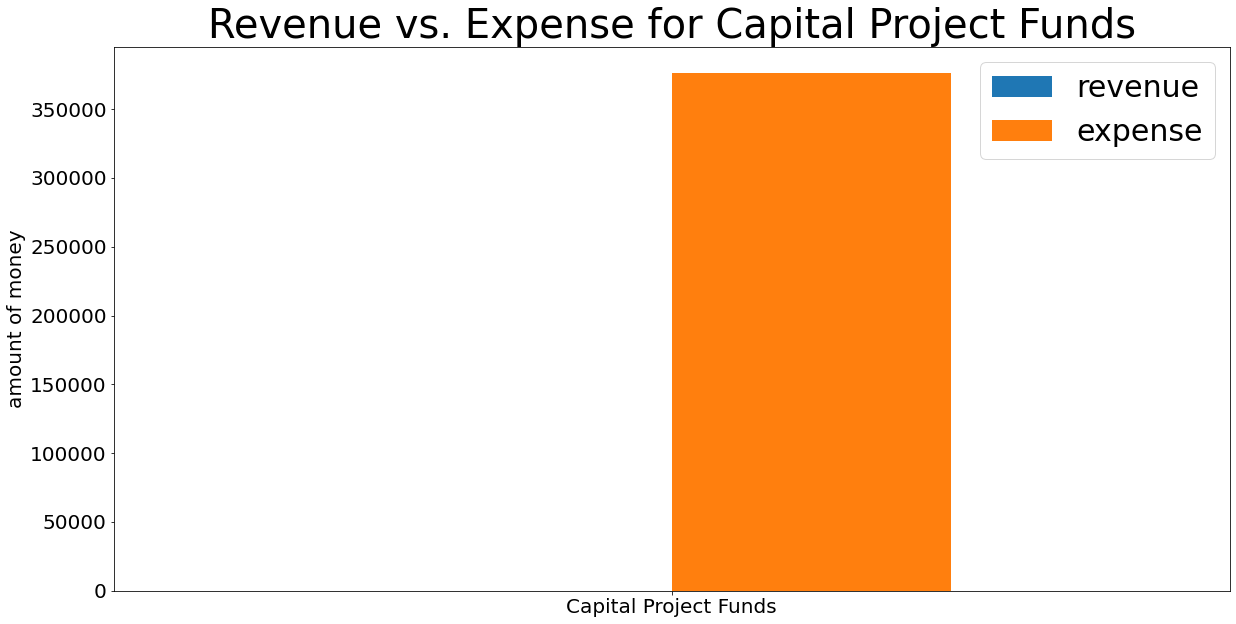

In [10]:
#visualize bar plot for df_capital
ax = df_capital.plot.bar(rot=0, figsize=(20,10), fontsize=20)
ax.set_title('Revenue vs. Expense for Capital Project Funds', fontsize=40)
ax.set_ylabel('amount of money', fontsize=20)
plt.legend(fontsize=30)

In [11]:
#generate dataframe df_general which has rows for revenues in General Funds
df_general = df_park_budget.loc[(df_park_budget['fund_type'] == 'General Fund') & (df_park_budget['account_type'] == 'revenue')]
#sum up the revenue of General Funds 
general_revenue = df_general['amount'].sum()

#generate dataframe df_general which has rows for expense in General Funds
df_general = df_park_budget.loc[(df_park_budget['fund_type'] == 'General Fund') & (df_park_budget['account_type'] == 'expense')]
#sum up the expense of General Funds
general_expense = df_general['amount'].sum()

#generate dataframe df_general which include total amount of revenue and expense for General Fund
data2 = [{'revenue': general_revenue, 'expense':general_expense}]
df_general = pd.DataFrame(data2, index=['General Fund'], columns=['revenue', 'expense'])

df_general

,revenue,expense
General Fund,3.278722e+08,8.738107e+08


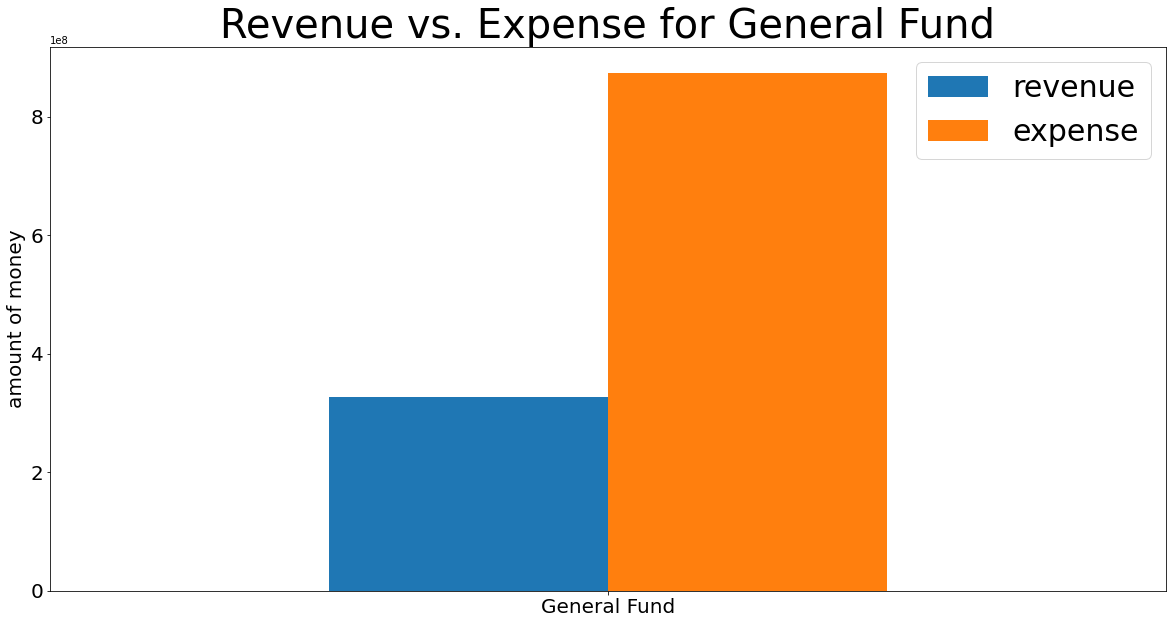

In [12]:
#visualize bar plot for df_general
ax = df_general.plot.bar(rot=0, figsize=(20,10), fontsize=20)
ax.set_title('Revenue vs. Expense for General Fund', fontsize=40)
ax.set_ylabel('amount of money', fontsize=20)
plt.legend(fontsize=30)

In [13]:
#generate dataframe df_enterprise which has rows for revenues in Enterprise Funds
df_enterprise = df_park_budget.loc[(df_park_budget['fund_type'] == 'Enterprise Funds') & (df_park_budget['account_type'] == 'revenue')]
#sum up the revenue of Enterprise Funds 
enterprise_revenue = df_enterprise['amount'].sum()

#generate dataframe df_enterprise which has rows for expense in Enterprise Funds
df_enterprise = df_park_budget.loc[(df_park_budget['fund_type'] == 'Enterprise Funds') & (df_park_budget['account_type'] == 'expense')]
#sum up the expense of Enterprise Funds
enterprise_expense = df_enterprise['amount'].sum()

#generate dataframe df_enterprise which include total amount of revenue and expense for Enterprise Fund
data3 = [{'revenue': enterprise_revenue, 'expense':enterprise_expense}]
df_enterprise = pd.DataFrame(data3, index=['Enterprise Funds'], columns=['revenue', 'expense'])

df_enterprise

,revenue,expense
Enterprise Funds,1.780796e+08,1.431774e+08


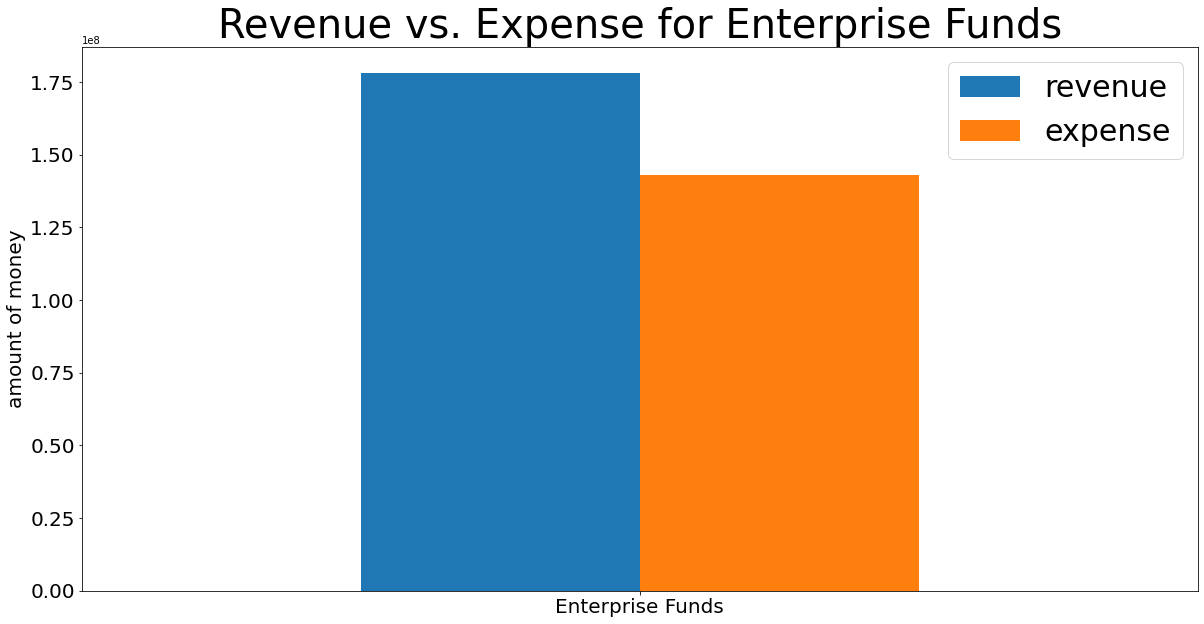

In [14]:
#visualize bar plot for df_enterprise
ax = df_enterprise.plot.bar(rot=0, figsize=(20,10), fontsize=20)
ax.set_title('Revenue vs. Expense for Enterprise Funds', fontsize=40)
ax.set_ylabel('amount of money', fontsize=20)
plt.legend(fontsize=30)

In [15]:
#generate dataframe df_special which has rows for revenues in Special Revenue Funds
df_special = df_park_budget.loc[(df_park_budget['fund_type'] == 'Special Revenue Funds') & (df_park_budget['account_type'] == 'revenue')]
#sum up the revenue of Special Revenue Funds 
special_revenue = df_special['amount'].sum()

#generate dataframe df_special which has rows for expense in Special Revenue Funds
df_special = df_park_budget.loc[(df_park_budget['fund_type'] == 'Special Revenue Funds') & (df_park_budget['account_type'] == 'expense')]
#sum up the expense of Special Revenue Funds
special_expense = df_special['amount'].sum()

#generate dataframe df_special which include total amount of revenue and expense for Special Revenue Fund
data4 = [{'revenue': special_revenue, 'expense':special_expense}]
df_special = pd.DataFrame(data3, index=['Special Revenue Funds'], columns=['revenue', 'expense'])

df_special

,revenue,expense
Special Revenue Funds,1.780796e+08,1.431774e+08


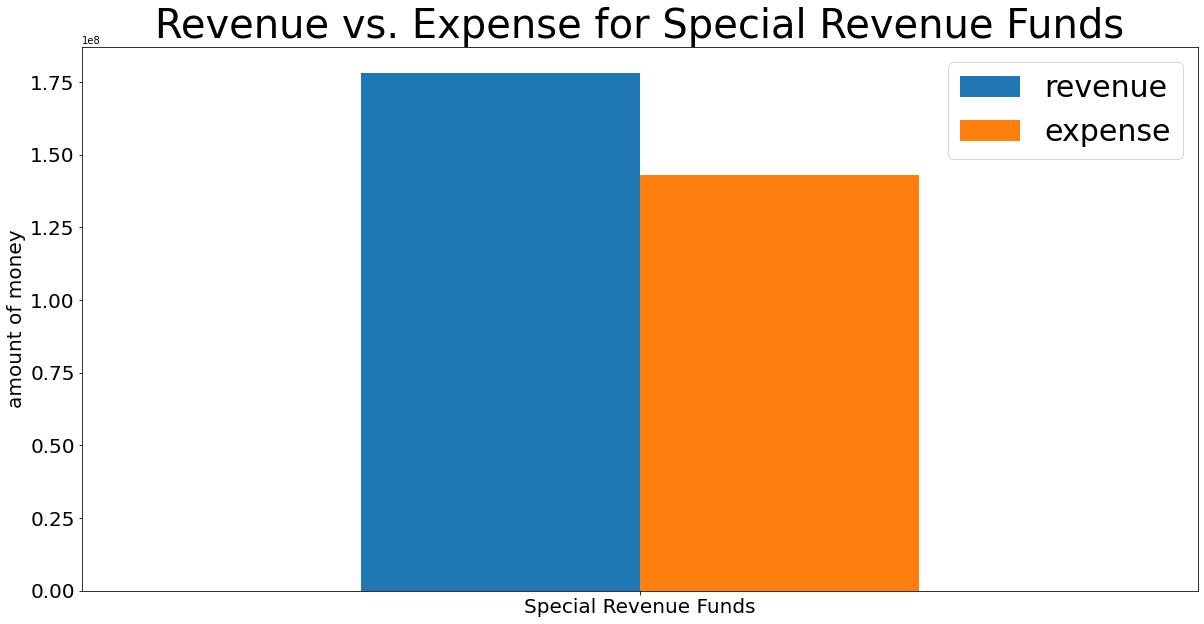

In [16]:
#visualize bar plot for df_special
ax = df_special.plot.bar(rot=0, figsize=(20,10), fontsize=20)
ax.set_title('Revenue vs. Expense for Special Revenue Funds', fontsize=40)
ax.set_ylabel('amount of money', fontsize=20)
plt.legend(fontsize=30)

In [17]:
#combine four fund types and its revenue and expense into a final dataframe
data5 = {'fund_type': ['Capital Project Funds', 'General Fund', 'Enterprise Funds', 'Special Revenue Funds'], 'revenue': [capital_revenue, general_revenue, enterprise_revenue, special_revenue], 'expense':[capital_expense, general_expense, enterprise_expense, special_expense]}
df_final = pd.DataFrame(data5)

df_final



,fund_type,revenue,expense
0,Capital Project Funds,0.000000e+00,3.761619e+05
1,General Fund,3.278722e+08,8.738107e+08
2,Enterprise Funds,1.780796e+08,1.431774e+08
3,Special Revenue Funds,1.995244e+08,3.000330e+08


In [18]:
#round up the value in columns 'revenue' and 'expense' for easier visualization later
df_final['revenue'] = df_final['revenue'].round()
df_final['expense'] = df_final['expense'].round()

df_final

,fund_type,revenue,expense
0,Capital Project Funds,0.0,376162.0
1,General Fund,327872190.0,873810689.0
2,Enterprise Funds,178079630.0,143177385.0
3,Special Revenue Funds,199524384.0,300032976.0


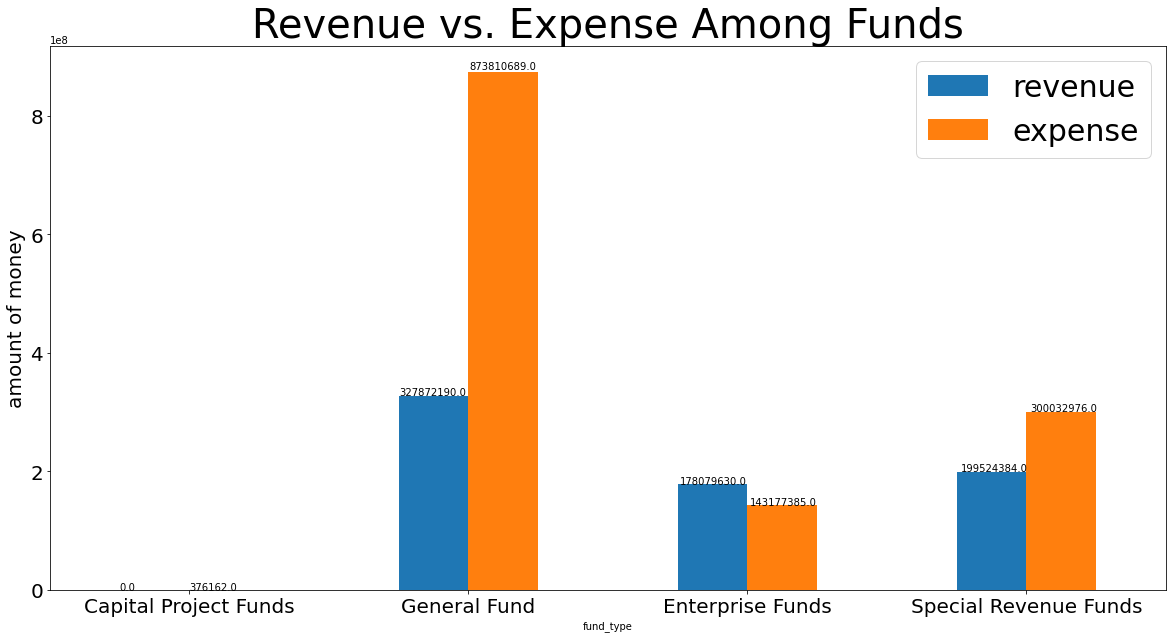

In [19]:
#visualize grouped bar plots of df_final
ax = df_final.plot.bar(x='fund_type', figsize=(20,10), fontsize=20, rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
ax.set_title('Revenue vs. Expense Among Funds', fontsize=40)
ax.set_ylabel('amount of money', fontsize=20)
plt.legend(fontsize=30)

# Ethics & Privacy
The curated dataset was given for use in this particular data analysis project by Prof.Ellis in COGS 108, UCSD. Also, the original dataset is available for the general public to view on data.sandiego.gov. Thus, I have the full permission to run analysis on these data. 

A potential area for concern would be the privacy of people who recorded the data. However, the dataset primarily focus on the operating costs of different deparments on a county level and no identifiable personal information is included. Thus, privacy will not be concerned.

There is potential for data inaccuracy since it invloves massive amounts observations from various types of departments. 454891 observations were recorded throughout years and the data may subject to human error in the documenting process. 

One possible unintended consequences of this analysis could be negatively emphasizing the excessive amount of expenses, since 80% of funding comes from taxes citizens pay. But this consequnece may be unavoidable since this analysis aims to provide insights on the distribution of both revenues and expenses among different funding types of San Diego Parks & Recreation.

# Conclusion & Discussion

In this analysis, I studied the distribution of revenues and expenses among different types of fundings, which could potentially assist San Diego administration in future budgeting for the maintenance and development of San Diego parks & recreation. First, I dropped columns that were not used in the later analysis to avoid complication. Then, I worte function to transform ambiguous number, which stands for the cost type, to String values which clearly indicate whether the cost is revenue or expense. I then noticed the inconsistence in expression in the "amount" column, thus, I wrote a function to transform all value to be positive regardless of its cost type. After getting done with the cleaning, I moved on the data analysis and visualization by first grouping the types of fund and summing up their revenues and expenses individually. Accroding the bar plots and grouped bar plot generated during the visualization, we came to the conclusion that my hypothesis was partially correct. The Capital Project Fund indeed have the lowest expense. However, the Enterprise Funds did not have the highest revenue. It is the General Fund that has the highest revenues and expenses at the same time. 

I acknowledged that there were potential limitations to this project which may affect the results I got. I dropped the colums with information that I won't be using for the analysis during cleaning. This could be one of the limitations of the analysis since these information could have potentially been applicable to this project. Another limitation could be the use of bar plots, which may not have been the best approach to analyze the data.

This project may help the administration pinpoint unnecessary expenditures and know when it’s time and how to cut costs to maintain profitability and make the best use of funds. Ultimately, this helps the government plan for the future of Parks & Recreation development and maintenance in San Diego County with more clarity and confidence.